In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings('ignore')
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [113]:
data=pd.read_csv('amazon_alexa.tsv',sep='\t')
display(data)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [114]:
cat_cols=data.select_dtypes('O')
num_cols=data.select_dtypes('int64')
print('Categorical Columns:')
print(cat_cols.columns)
print('Numerical Columns:')
print(num_cols.columns)

Categorical Columns:
Index(['date', 'variation', 'verified_reviews'], dtype='object')
Numerical Columns:
Index(['rating', 'feedback'], dtype='object')


In [115]:
print('VALUE COUNTS:')
print('-'*20)
print("Rating:")
print(data['rating'].value_counts())
print('*'*20)
print('Variation:')
print(data['variation'].value_counts())
print('*'*20)
print('Feedback:')
print(data['feedback'].value_counts())

VALUE COUNTS:
--------------------
Rating:
rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64
********************
Variation:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64
********************
Feedback:
feedback
1    2893
0     257
Name: count, dtype: int64


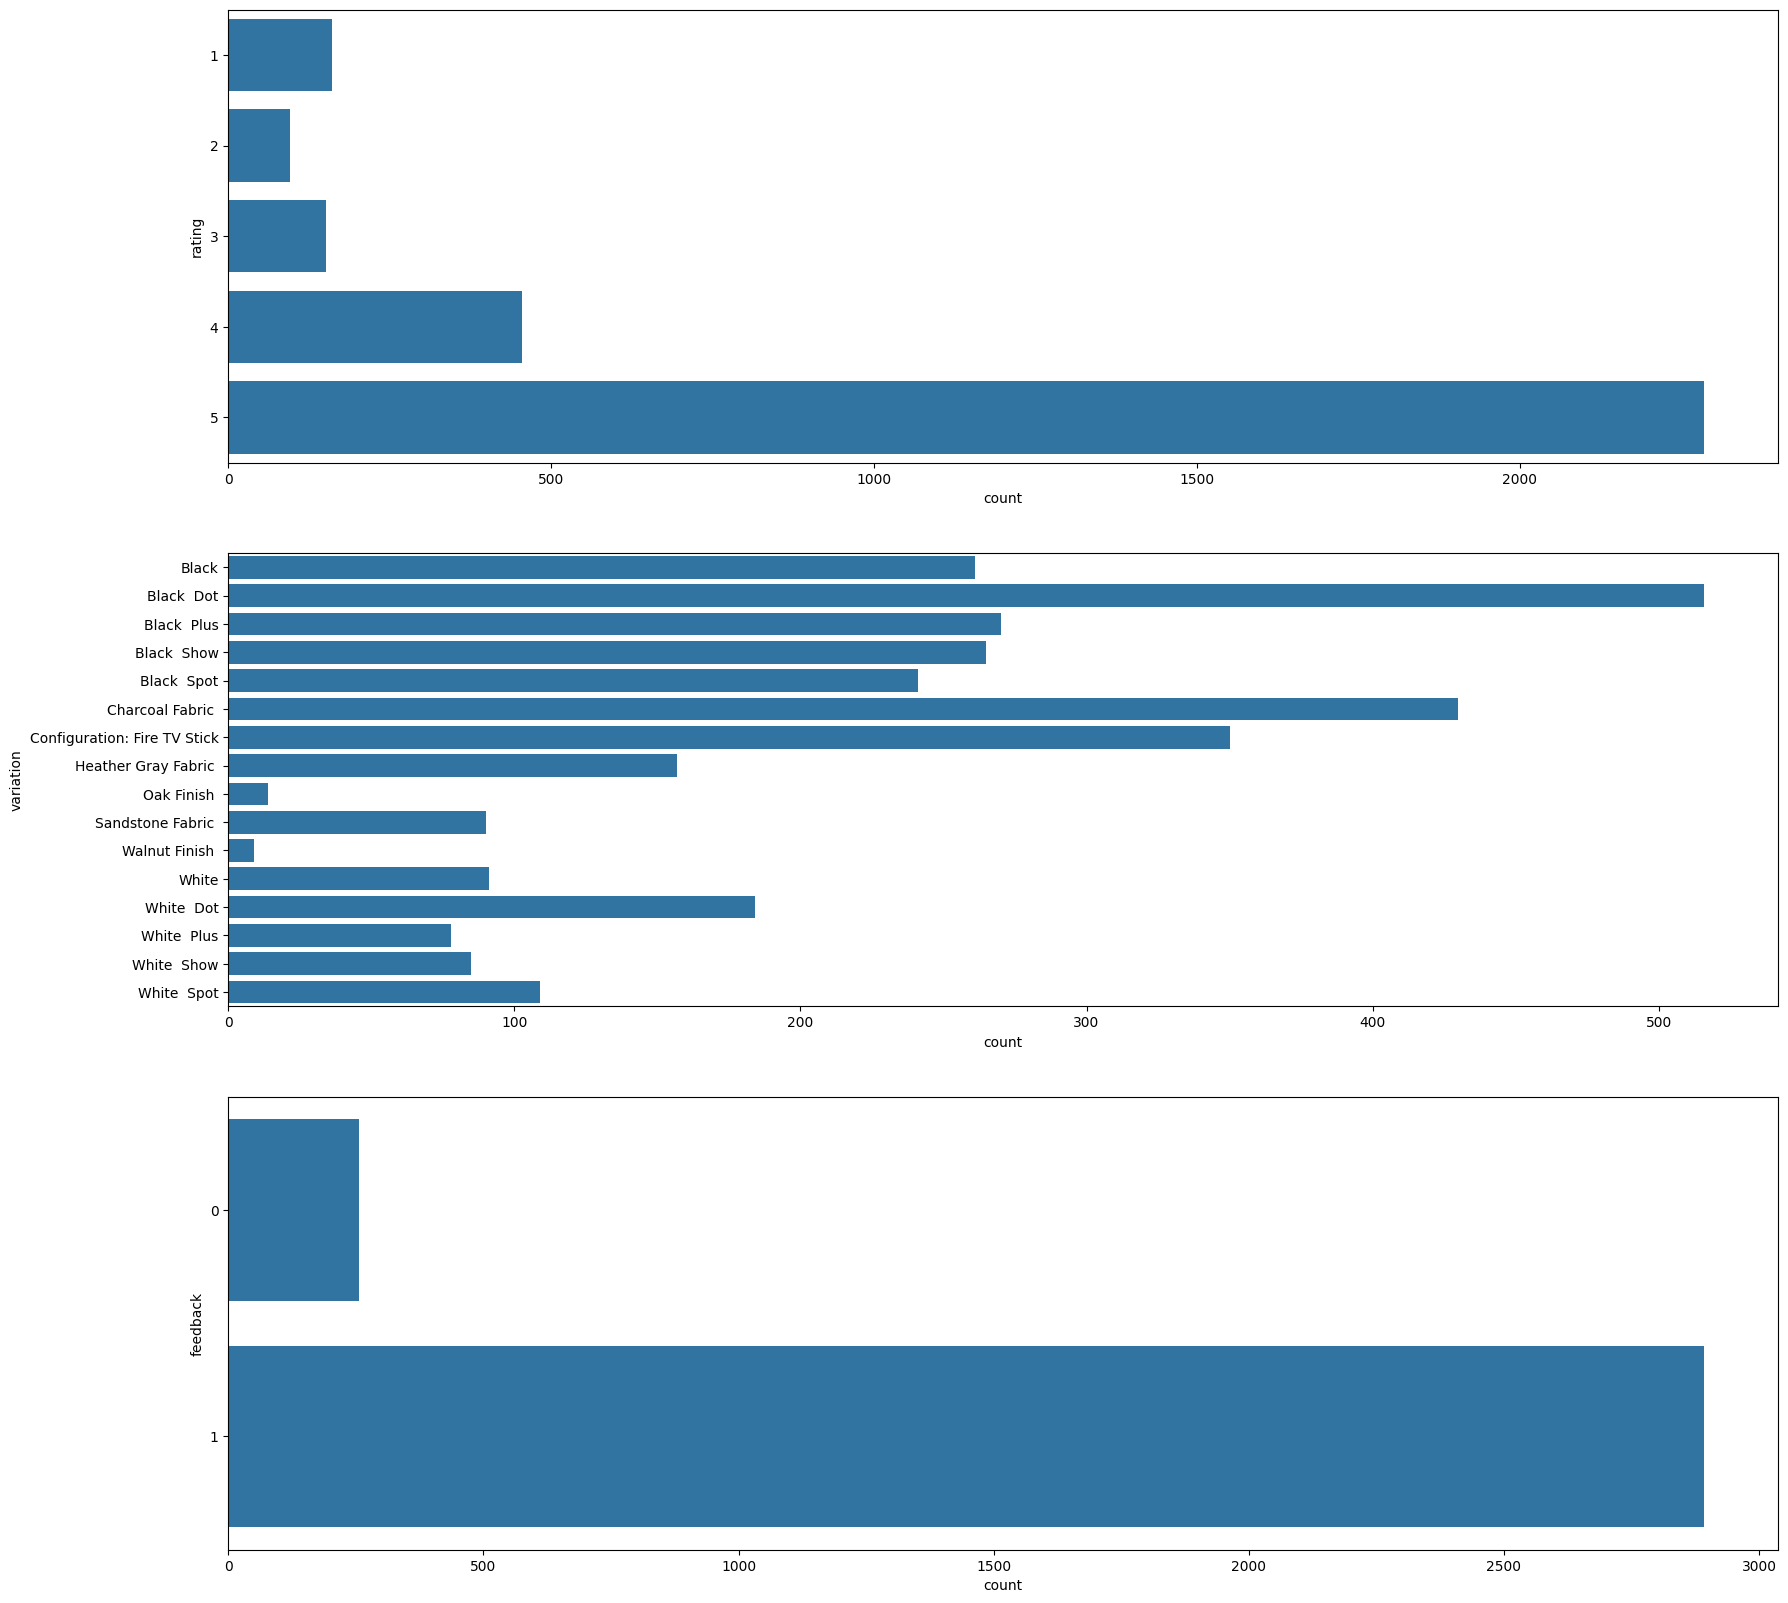

In [116]:
i=1
plt.figure(figsize=(20,20))
for c in ['rating','variation','feedback']:
    plt.subplot(3,1,i)
    sns.countplot(y=data[c].sort_values())
    i+=1

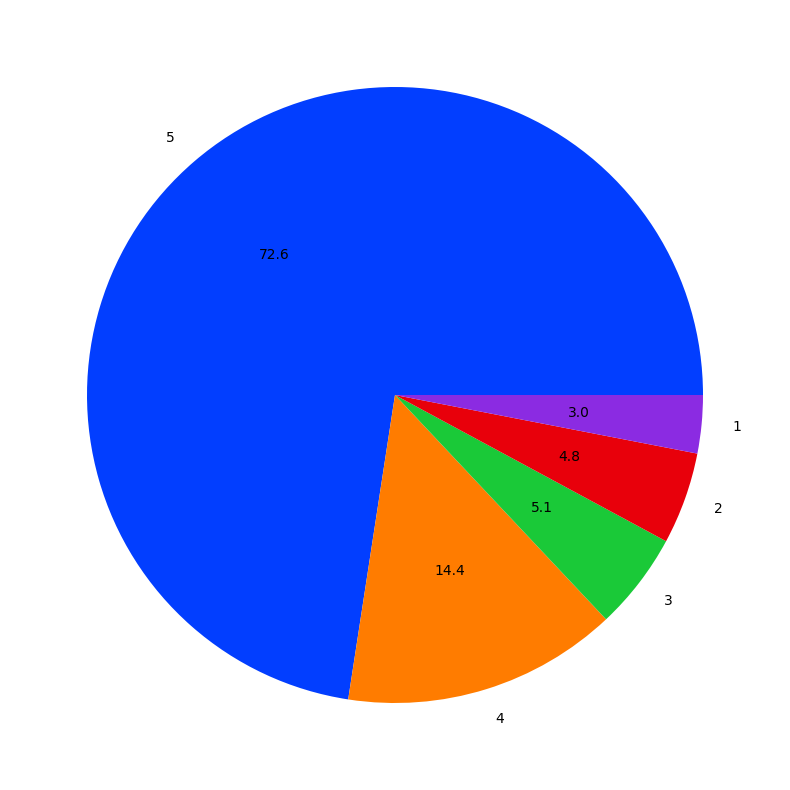

In [117]:
plt.figure(figsize=(10,10))
palette_color=sns.color_palette('bright')
plt.pie(data['rating'].value_counts(),labels=list(data['rating'].unique()),colors=palette_color,autopct='%1.1f')
plt.show()

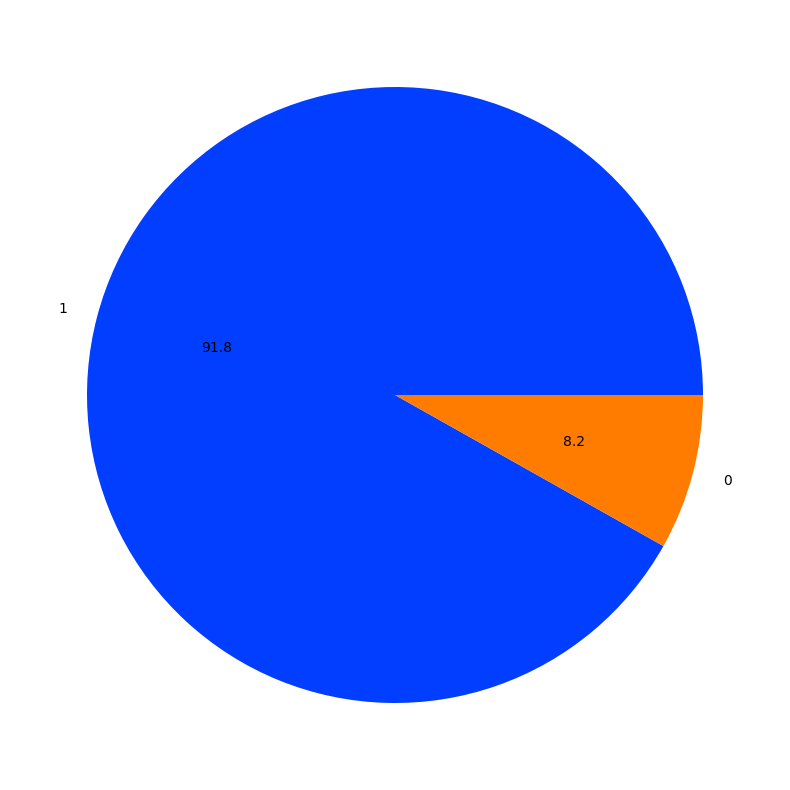

In [118]:
plt.figure(figsize=(10,10))
palette_color=sns.color_palette('bright')
plt.pie(data['feedback'].value_counts(),labels=list(data['feedback'].unique()),colors=palette_color,autopct='%1.1f')
plt.show()

In [119]:
import pandas as pd

data = pd.read_csv('amazon_alexa.tsv', sep='\t')

print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [120]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

data = data.dropna(subset=['verified_reviews'])


Missing values per column:
 rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [121]:
print(data.dtypes)


rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object


In [122]:
print(data['feedback'].value_counts())


feedback
1    2893
0     256
Name: count, dtype: int64


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [124]:
X = data['verified_reviews']  # Text data
y = data['feedback']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [126]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.90      1.00      0.95       567

    accuracy                           0.90       630
   macro avg       0.45      0.50      0.47       630
weighted avg       0.81      0.90      0.85       630



In [127]:
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9174603174603174
SVM Report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.30        63
           1       0.92      1.00      0.96       567

    accuracy                           0.92       630
   macro avg       0.96      0.59      0.63       630
weighted avg       0.92      0.92      0.89       630



In [128]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9206349206349206
Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.24      0.38        63
           1       0.92      1.00      0.96       567

    accuracy                           0.92       630
   macro avg       0.90      0.62      0.67       630
weighted avg       0.92      0.92      0.90       630



In [129]:
mlp_model = MLPClassifier(max_iter=300)
mlp_model.fit(X_train_tfidf, y_train)

y_pred_mlp = mlp_model.predict(X_test_tfidf)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Report:\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.9174603174603174
MLP Report:
               precision    recall  f1-score   support

           0       0.63      0.41      0.50        63
           1       0.94      0.97      0.96       567

    accuracy                           0.92       630
   macro avg       0.79      0.69      0.73       630
weighted avg       0.91      0.92      0.91       630



In [130]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Multilayer Perceptron': MLPClassifier(max_iter=300)
}


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)  
    
    y_pred = model.predict(X_val_tfidf)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("-" * 50)


Training Logistic Regression...
Logistic Regression Performance:
Accuracy: 0.90
Precision: 0.90
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.90      1.00      0.95       567

    accuracy                           0.90       630
   macro avg       0.45      0.50      0.47       630
weighted avg       0.81      0.90      0.85       630

--------------------------------------------------
Training Support Vector Machine...
Support Vector Machine Performance:
Accuracy: 0.92
Precision: 0.92
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.30        63
           1       0.92      1.00      0.96       567

    accuracy                           0.92       630
   macro avg       0.96      0.59      0.63       630
weighted avg       0.92      0.92      0.89       630

-------------------------